In [1]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

# Modelling & Numerical Methods <a class="tocSkip">

## Interpolation & Quadrature 2 <a class="tocSkip">
    
### Homework Exercises <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Newton-polynomial-[$\star$]" data-toc-modified-id="Homework---Newton-polynomial-[$\star$]-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Newton polynomial [$\star$]</a></span></li><li><span><a href="#Homework---Hat-functions-and-their-derivatives" data-toc-modified-id="Homework---Hat-functions-and-their-derivatives-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Hat functions and their derivatives</a></span></li><li><span><a href="#Homework---Error-bound-for-polynomial-interpolation-of-the-Runge-function-[$\star$]" data-toc-modified-id="Homework---Error-bound-for-polynomial-interpolation-of-the-Runge-function-[$\star$]-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Error bound for polynomial interpolation of the Runge function [$\star$]</a></span></li><li><span><a href="#Homework---Chebyshev-interpolation-[$\star$]" data-toc-modified-id="Homework---Chebyshev-interpolation-[$\star$]-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Chebyshev interpolation [$\star$]</a></span></li><li><span><a href="#Homework---Chebyshev-polynomials-as-basis-functions-[$\star\star$]" data-toc-modified-id="Homework---Chebyshev-polynomials-as-basis-functions-[$\star\star$]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Chebyshev polynomials as basis functions [$\star\star$]</a></span></li><li><span><a href="#Homework---Cubic-spline-interpolation-[$\star\star$]" data-toc-modified-id="Homework---Cubic-spline-interpolation-[$\star\star$]-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - Cubic spline interpolation [$\star\star$]</a></span></li><li><span><a href="#Homework---Implement-Weddle's-rule" data-toc-modified-id="Homework---Implement-Weddle's-rule-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Homework - Implement Weddle's rule</a></span></li><li><span><a href="#Homework---Midpoint-rule-error-[$\star$]" data-toc-modified-id="Homework---Midpoint-rule-error-[$\star$]-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Homework - Midpoint rule error [$\star$]</a></span></li><li><span><a href="#Homework---Derive-Simpson's-rule-as-quadratic-fit-[$\star\star$]" data-toc-modified-id="Homework---Derive-Simpson's-rule-as-quadratic-fit-[$\star\star$]-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Homework - Derive Simpson's rule as quadratic fit [$\star\star$]</a></span></li><li><span><a href="#Homework---Open-vs-closed-Newton-Cotes-[$\star\star$]" data-toc-modified-id="Homework---Open-vs-closed-Newton-Cotes-[$\star\star$]-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Homework - Open vs closed Newton-Cotes [$\star\star$]</a></span></li><li><span><a href="#Homework---Implement-adaptive-quadrature-[$\star$]" data-toc-modified-id="Homework---Implement-adaptive-quadrature-[$\star$]-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Homework - Implement adaptive quadrature [$\star$]</a></span></li><li><span><a href="#Homework---Implement-a-&quot;composite&quot;-version-of-Gauss-Legendre-quadrature-[$\star\star$]" data-toc-modified-id="Homework---Implement-a-&quot;composite&quot;-version-of-Gauss-Legendre-quadrature-[$\star\star$]-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Homework - Implement a "composite" version of Gauss-Legendre quadrature [$\star\star$]</a></span></li></ul></li></ul></div>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# as this lecture is about interpolation we will make use of this SciPy library
import scipy.interpolate as si
import scipy.integrate as integrate

# some default font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Homework

<div class="optional">
    
## Homework - Newton polynomial [$\star$]

From the lecture we defined the Newton polynomial as

$$ P_N(x) = a_0 +(x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + \cdots + (x-x_0)(x-x_1)\ldots(x-x_{N-1})a_N,$$

where $a_0, a_1, \ldots, a_N$ are our $N+1$ free parameters we need to find using the $N+1$ pieces of information we have in the given data.

We introduced the divided difference notation

\begin{alignat*}{2}
\Delta y_i &= \frac{y_i-y_0}{x_i-x_0},\;\;    && i=1,2,\ldots, N,\\[10pt]
\Delta^2 y_i &= \frac{\Delta y_i-\Delta y_1}{x_i-x_1},\;\;    && i=2, 3,\ldots, N,\\[10pt]
&\vdots\\[5pt]
\Delta^N y_N &= \frac{\Delta^{N-1} y_N-\Delta^{N-1} y_{N-1}}{x_N-x_{N-1}},
\end{alignat*}


and saw that the unknown coefficients $a$ are given by


$$a_0=y_0,\;\;\;\;\; a_1 = \Delta y_1, \;\;\;\;\; a_2 = \Delta^2 y_2, \;\;\;\;\; \ldots \;\;\;\;\; a_N = \Delta^N y_N.$$


Based upon the following pseudo code implement functions to (1) calculate the coefficients of the Newton polynomial, and (2) evaluate it for the purposes of plotting. Check visually that your plotted curve of the interpolant agrees with what we saw for the Lagrange polynomial (obtained either with SciPy our our own implementation: `Lagrange_basis_poly` and `Lagrange_interp_poly`) and passes through our data points - use the same data made up of 6 points we used in the lecture:

``` Python
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])
```

*Pseudo-code / code skeleton:*

``` Python
def calculate_newton_poly_coeffs(xi, yi):
    """Function to evaluate the coefficients a_i recursively
    using Newton's method.

    Parameters
    ----------
    xi, yi : array_like
        The N+1 data points (i = 0, 1, ..., N)

    Returns
    -------
    a : array_like
        Array containing the Newton polynomial coefficients
    """
    # initialise the array 'a' with yi, but take a copy to ensure we don't
    # overwrite our yi data!
    a = yi.copy()

    # we have N+1 data points, and so
    N = len(a) - 1

    # for each k, we compute Δ^k y_i from the a_i = Δ^(k-1) y_i of the previous iteration:
    for k in range(1, N+1):
        # but only for i>=k
        for i in range(k, N+1):
            a[i] = *** you need to fill in the maths here ***

    return a
    
    
def eval_newton_poly(a, xi, x):
    """Function to evaluate the Newton polynomial
    at x, given the data point xi and the polynomial coeffs a.

    a : array_like
        Newton polynomial coefficients
    xi : array_like
        The x-component of the data
    x : array_like
        Array of x-locations the Newton polynomial is evaluated at

    Returns
    -------
    P : array_like
        Newton polynomial values for points x
    """
    N = len(xi) - 1  # polynomial degree
    # recursively build up polynomial evaluated at xx
    P = a[N]
    for k in range(1, N+1):
        P = *** you need to fill in the maths here ***
        
    return P
    
# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

# add a small margin 
ax1.margins(0.1)

# Evaluate the coefficients of the Newton polynomial
a = calculate_newton_poly_coeffs(xi, yi)
# Evaluate the polynomial at high resolution and plot
x = np.linspace(0.4, 9.1, 100)
ax1.plot(x, eval_poly(a, xi, x), 'b', label='Newton poly')

# Overlay raw data
plot_raw_data(xi, yi, ax1)
ax1.set_title('Newton interpolating polynomial (our implementation)', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);
```
</div>

## Homework - Hat functions and their derivatives

Recall that the hat functions we used as basis functions for p/w linear interpolation
are defined as

$$
\phi_i(x) = 
\begin{cases}
\frac{x - x_{i-1}}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
\frac{x_{i+1} - x}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$

which looks like the following:

<img src="figures/fem_basis_functions.svg" style="width: 800px">

<br>

Compute an analytical expression for their derivatives and write a function to evaluate them. Plot your results, what happens if you have non-uniform interval sizes (distances between data points)?

In [ ]:
x_1 = [1, 2, 3]
def phi_dx(i, x):
    if x 

<div class="optional">

## Homework - Error bound for polynomial interpolation of the Runge function [$\star$]

We can use SymPy to calculate and then plot the derivatives of the Runge function for example we can do something like

``` Python
import sympy

x = sympy.Symbol('x', real=True)
f = 1. / (1. + 25. * x**2)
print("f(x) = ", (sympy.simplify(f)))
f_ = sympy.lambdify(x,f)

dfdx = sympy.diff(f, x) 
print("f'(x) = ", (sympy.simplify(dfdx)))
dfdx_ = sympy.lambdify(x,dfdx)

dfdx2 = sympy.diff(dfdx, x) 
print("f''(x) = ", (sympy.simplify(dfdx2)))
dfdx2_ = sympy.lambdify(x,dfdx2)

dfdx3 = sympy.diff(dfdx2, x) 
print("f'''(x) = ", (sympy.simplify(dfdx3)))
dfdx3_ = sympy.lambdify(x,dfdx3)

xf = np.linspace(-1.0, 1.0, 1000)

fig, ax = plt.subplots(1, 4, figsize=(12, 4))
fig.tight_layout(w_pad=3, h_pad=4)
ax[0].plot(xf, f_(xf), 'b'); ax[0].set_title("f(x)")
ax[1].plot(xf, dfdx_(xf), 'b'); ax[1].set_title("f'(x)")
ax[2].plot(xf, dfdx2_(xf), 'b'); ax[2].set_title("f''(x)")
ax[3].plot(xf, dfdx3_(xf), 'b'); ax[3].set_title("f'''(x)")
```

and to compute an $(N+1)$-st derivative, say, we could do something like

``` Python
N = 10
df = f
for i in range(N+1):
    df = sympy.diff(df, x) 
```

Play around a bit with SymPy and try plotting our error bound 

$$\left| f(x) - P_N(x) \right| \le \frac{1}{(N+1)!}\, M\, \left|\Psi_N(x)\right|
\;\;\;\;\;\;\text{where}\;\;\;\;\;\;
M:=\max_{x\in(a,b)}\, \left| f^{(N+1)}(x) \right|,$$ 

you should see that as you increase $N$ the error bound gets larger quite rapidly and more and more focused at the end points of our interval.

</div>

<div class="optional">

## Homework - Chebyshev interpolation [$\star$]

Consider the cell in the lecture where we computed and plotted the Chebyshev interpolant using a call to `si.lagrange` (from inside the function `plot_approximation`), i.e. where the loop read

``` Python
for i, degree in enumerate(degrees):
    # the Chebyshev nodes
    xi = np.cos((2.0 * np.arange(1, degree+2) - 1.0) * np.pi / (2.0 * (degree+1)))
    # compute and plot the Lagrange polynomial using Chebyshev nodes as data locations
    plot_approximation(runge, xi, ax[i])
    ax[i].plot(xi, runge(xi), 'ko', label='data')
    ax[i].set_title('Degree %i' % degree, fontsize=12)
    ax[i].legend(loc='best', fontsize=12)
```

Recreate the four plots that resulted, but update the code (specifically our function `plot_approximation`) so that it instead calls our Lagrangian interpolation function `Lagrange_interp_poly`.

</div>

<div class="advanced">

## Homework - Chebyshev polynomials as basis functions [$\star\star$]

Recall from lectures that the degree $N$ Lagrange polynomial interpolating $N+1$ data points is given by

$$L(x) := \sum_{i=0}^{N} y_i \ell_i(x),$$

where the $\ell_i(x)$ are the Lagrange basis functions defined by

$$\ell_i(x) := \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}} \frac{x-x_m}{x_i-x_m},$$

[note that each of these basis functions is itself a degree $N$ polynomial].

A general result is the following:

If the $N+1$ data locations, $x_0 < x_1 < \ldots < x_N,$ are the roots of some (N+1) degree polynomial $\phi_{N+1}(x)$  (from an [*orthogonal family* of polynomials](https://en.wikipedia.org/wiki/Orthogonal_polynomials), e.g. the [*Chebyshev polynomials*](https://en.wikipedia.org/wiki/Chebyshev_polynomials)) we introduced in lecture and have a nice minimal error property, then the Lagrange basis functions are equivalent to 

$$\ell_i(x) \equiv \frac{\phi_{N+1}(x)}{(x - x_i)\phi'_{N+1}(x_i)},$$

where $\phi'$ is the derivative of $\phi$.  [See Chebyshev Polynomials, by J.C. Mason, D.C. Handscomb (Chapter 6)].

In the specific case we discussed in class where the $x_0 < x_1 < \ldots < x_N,$ are the roots of the Chebyshev polynomial (which was the choice which minimised the issue we had with interpolation of the Runge function) we have that the Lagrange basis functions are equivalent to

$$\ell_i(x) = \frac{T_{N+1}(x)}{(N+1)(x - x_i)U_{N}(x_i)},$$

where $T$ and $U$ are the Chebyshev polynomials of the first and second kind respectively, i.e. the Lagrange basis functions are equivalent to scaled Chebyshev polynomials.

Now of course we end up at the same final interpolating polynomial as we did with the standard Lagrange polynomial approach, but now the basis functions are not all degree $N$ polynomials (as we will see in the code and web links directly below).


Try updating our function `Lagrange_interp_poly` so that instead of calling the function `Lagrange_basis_poly` to compute the Lagrange basis functions using the expression at the top of this cell, it calls a new function which computes the basis functions in terms of the above formula involving Chebyshev polynomials of the first ($T$) and second ($U$) kind.  

You can use the recurrence relations defining these families of polynomials here: <https://en.wikipedia.org/wiki/Chebyshev_polynomials#Definition>

As a hint here is a function which computes the polynomial of the first kind (you'll need to code up the second kind yourself)

```Python 
def Chebyshev_first_kind(N, x):
    """Function to compute the Chebyshev polynomial of the first kind.

    Parameters
    ----------
    N : int
        Degree of the polynomial
    x : array_like
        Array of x-locations the polynomial is evaluated at

    Returns
    -------
    T : ndarray
        Chebyshev polynomial of the first kind evaluated at x
    """
    T = np.zeros((N+1, len(x)))
    T[0,:] = 1
    if N == 0:
        return T
    T[1,:] = x
    if N == 1:
        return T
    for n in range(2, N+1):
        T[n,:] = 2 * x * T[n-1,:] - T[n-2,:]
    return T
```

And as a further hint, in my solution I replace these lines from `Lagrange_interp_poly`

```Python
    l = Lagrange_basis_poly(xi, x)
    L = np.zeros_like(x)
    for i in range(0, len(xi)):
        L = L + yi[i]*l[i]
```

with 

```Python
    T = Chebyshev_first_kind(N+1, x)
    U = Chebyshev_second_kind(N, xi)
    Chebyshev_interpolant = np.zeros_like(x)
    for i in range(0, len(xi)):
        Chebyshev_interpolant = Chebyshev_interpolant  \
            + yi[i]*T[-1,:]/((N+1)*(x-xi[i])*U[-1,i])
```

I called the new function `Chebyshev_interp_poly`.


Test your answer by recreating the above plots of the approximation (obtained using `Lagrange_interp_poly`) to the Runge functions using `degrees = [5, 9, 12, 20]`.

</div>

<div class="advanced">

## Homework - Cubic spline interpolation [$\star\star$]

Write some code to implement and plot a cubic spline and recreate the figure from class obtained using SciPy, based on the theory below. If you get this right and if you do a little bit of extrapolation outside our data range then you will see that the behaviour here does not quite agree with SciPy. Read the SciPy docs to see why this is (consider the default boundary conditions) and redo the SciPy plot to agree with your code.
    
</div>

## Homework - Implement Weddle's rule

As explained in the lecture, we can implement Weddle's rule using appropriate calls to the `simpsons_composite_rule` function.

Do this and try to recreate the convergence plot from the lecture:

<img src="./figures/weddle_convergence.png" width=500x>



In [1]:
def composite_simpsons_rule(a, b, function, number_intervals=10):
    """Function to evaluate the composite Simpson's rule only using
    function evaluations at (number_intervals + 1) points.
    
    This implementation requires that the number of subintervals (number_intervals) be even
    """
    assert number_intervals % 2 == 0, "number_intervals is not even"

    interval_size = (b - a) / number_intervals
    # start with the two end member values
    I_cS2 = function(a) + function(b)

    # add in those terms with a coefficient of 4
    for i in range(1, number_intervals, 2):
        I_cS2 += 4 * function(a + i * interval_size)

    # and those terms with a coefficient of 2
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * function(a + i * interval_size)

    return I_cS2 * (interval_size / 3.0)

In [2]:
def weddles_rule(a, b, function, number_intervals=10):
        inps_2 = [a, b, function, number_intervals*2]
        inps = [a, b, function, number_intervals]
        
        I_s_2 = composite_simpsons_rule(*inps)
        I_s = composite_simpsons_rule(*inps_2)
        
        return I_s_2 + ((I_s_2 - I_s) / 15)

In [23]:
f = lambda x : x**2
f_aoc = lambda a, b : (b ** 3) / 3 - (a ** 3) / 3

In [7]:
import matplotlib.pyplot as plt

In [11]:
import numpy as np

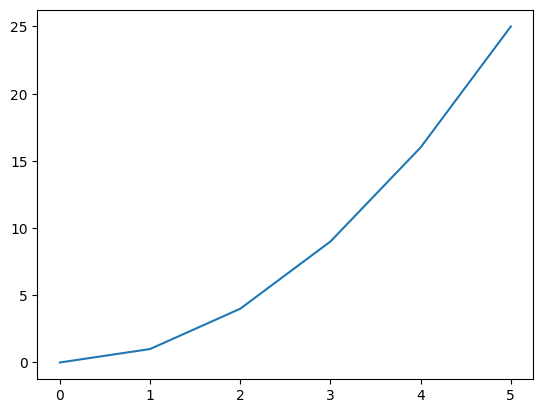

In [12]:
x = np.array([0,1,2,3,4,5])
plt.plot(x, f(x))

0.0
0.0
0.0
0.0
0.0
0.0


/home/javonne/anaconda3/envs/ese-msc/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


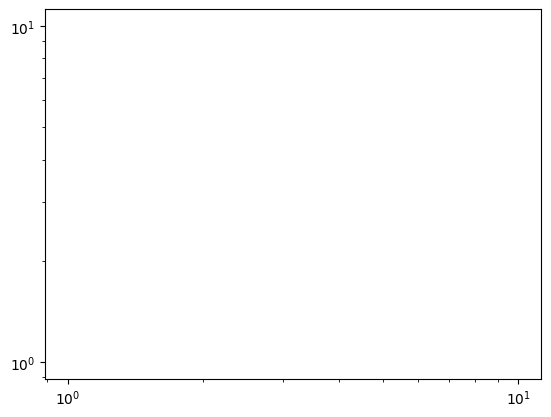

In [36]:
# error:
for i in x:
    errors = []
    analytical_solution = f_aoc(x[0], x[-1]) 
    weddle_estimate = weddles_rule(
        a=x[0], 
        b=x[-1], 
        function=f, 
        number_intervals=1)
    
    error = abs(weddle_estimate-analytical_solution)
    print(error)
    errors.append(error)
    
fig, ax = plt.subplots(1,1)
ax.loglog(errors)

<div class="optional">
    
## Homework - Midpoint rule error [$\star$]

In class we stated that a bound on the midpoint rule's error is given by

$$ \left| E_M^n \right| \le \frac{(b-a)^3}{24n^2}  \max_{x\in[a,b]}\, \left| f''(x) \right|. $$

And we noted that for midpoint (and all odd order Newton-Cotes rules including Simpson's rule) we gain an order of precision/accuracy over what we might expect, i.e. here this error bound indicates that the method is second-order accurate
and integrates linear polynomials exactly.

If we follow the error bound derivation we performed in lecture for the Trapezoidal rule, we would progress by
taking $N=0$ (as the midpoint rule is fitting a constant, degree zero, function) and using our Lagrange remainder result to estimate the *interpolation error* over the interval $[a,b]$ as:

$$R_0(x) = \left(x - \frac{1}{2}(a+b)\right) {f'(c_x)}.$$

Our Midpoint rule quadrature error over a single interval $[a,b]$ could then be estimated via

\begin{align*}
E_M \equiv E_0 = I - I_0 
&= \int_{a}^{b} f\left ( x \right )\, dx - \int_a^b\,P_0\left ( x \right )\,dx \\[5pt]
&= \int_{a}^{b} f\left ( x \right ) - P_0\left ( x \right ) \, dx\\[5pt] 
&= \int_{a}^{b} R_0\left ( x \right )\, dx.
\end{align*}

Substitute in the above expression for $R_0(x)$ and demonstrate that this leading order term in the error expansion is indeed zero.

Once you've convinced yourself of this I suggest take a look at my derivation of the error bound in the sample solution which involves taking the next order term in the Taylor series expansion about the midpoint of an interval.

</div>

<div class="advanced">

## Homework - Derive Simpson's rule as quadratic fit [$\star\star$]

We stated in the lecture that:

Note that an alternate derivation of the same rule involves fitting a *quadratic function* (i.e. $P_2(x)$ rather than the constant and linear approximations already considered) that interpolates the integral at the two end points of the interval, $a$ and $b$, as well as at the midpoint, $c = \left ( a+b\right )/2$, and calculating the integral under that polynomial approximation. We'll come back to this idea a bit later.

Take a look also at the Newton-Cotes section of the lecture where we derived the Trapezoidal rule with the choice $N=1$. We arrive at Simpson's (1/3) rule if we repeat this process with $N=2$.

Do this.

<br>
         
**Hint:** Note that following the derivation of the Trapezoidal rule from lectures you will need to evaluate integrals of the form

\begin{align*}
A_0 &= \int_{x_0}^{x_2}\, \ell_0(x)\, dx \\[5pt]
& = \frac{1}{(x_0-x_1)(x_0-x_2)}\int_{x_0}^{x_2}\, (x-x_1)(x - x_2) \, dx.
\end{align*}

This integral is much easier to do if you introduce the new variable (i.e. a [change of variables](https://en.wikipedia.org/wiki/Integration_by_substitution)) $\xi$ such that $d\xi = dx$ and $\xi=0$ corresponds to $x_1$, $\xi = -h$ corresponds to $x_0$ and $\xi = h$ corresponds to $x_2$. Note therefore that the interval size $x_2-x_0 = 2h$. 

Your integral then becomes

\begin{align*}
A_0 & = \frac{1}{(x_0-x_1)(x_0-x_2)}\int_{x_0}^{x_2}\, (x-x_1)(x - x_2) \, dx \\[5pt]
& = \frac{1}{(-h)(-2h)}\int_{-h}^{h}\, \xi(\xi - h) \, d\xi = \ldots = \frac{h}{3}.
\end{align*}

Fill in the gaps and do the other integrals to complete the derivation.

</div>

<div class="advanced">

## Homework - Open vs closed Newton-Cotes [$\star\star$]

Implement an open Newton-Cotes formula and use it to integrate $1/\sqrt{x}$  from 0 to 1. 

**Hint:** Check the open formulae here <https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas#Open_Newton%E2%80%93Cotes_formulas>.  My solution makes use of  Milne's rule which evaluates the function at the appropriate points within each sub-interval, and so uses more function evaluations for a given number of intervals compared to the composite version of Simpson's rule.

Compare your solution with a closed scheme such as Simpson's, e.g. by recreating a convergence plot such as that presented in the Lecture.

**Hint:**  Note that to avoid divide by zero warning you could define your integrand via something like:
`lambda x: 1./(np.maximum(1e-16,np.sqrt(x)))`
    
</div>

<div class="optional">

## Homework - Implement adaptive quadrature [$\star$]

Based on the algorithm description from the lecture, try to implement an adaptive quadrature algorithm and apply it to our complicated function given in the following cell.

<br>
    
**Hint:**  My function and an explanatory docstring starts

```Python
def adaptive_simpson_recursive(a, b, function, tol, S):
    """ S is a Simpson rule estimate of the integral over interval [a,b]
    This function computes S2 by splitting the current interval in half 
    and evaluating Simpson's rule over each of the two resulting sub-intervals. 
    It then evaluates an estimate of the quadrature error over the interval as 
    (S2-S)/15, and if we have not yet reached the desired error tolerance it 
    divides the current interval [a,b] in two and applies the same function to 
    each half: [a,c] and [c,b]. 
    If an error tolerance has been reached it returns the Weddle estimate for
    the integral over [a,b]: S2 + (S2 - S)/15.0.
    The function recursively sums the result from each subinterval considered. 
    `locs' is a global variable that contains all the locations we evaluate the
    function at.
    """
```

<br>

**I've listed this as optional rather than advanced as I think it's a good one to work through, but it is quite involved and could easily have been tagged as "advanced".**

**Note that you should NOT assume I've done this as I'm planning on this being part of the assessment - it will NOT be.**

</div>

In [ ]:
# a more complex example (taken from Moin which quotes the exact integral as −0.56681975015)

def f(x):
    """The function we wish to integrate.
    
    This a more complicated example which has been taken from the book by Moin.
    """
    return (10*np.exp(-50*np.abs(x)) -
            (0.01/(np.power(x-0.5, 2) + 0.001)) +
            5*np.sin(5*x))

# exact solution obtained with (si.quad(f, -1, 1, epsabs=1e-16))
# NB. the "exact" value given in Moin only to 11 s.f.s: −0.56681975015
I_exact = -0.5668197501529302

<div class="advanced">
    
## Homework - Implement a "composite" version of Gauss-Legendre quadrature [$\star\star$]

Implement a "composite" version of Gauss-Legendre, i.e. split up the total interval into sub-intervals, apply Gauss-Legendre on each subinterval and sum.

Compare this method, for differing degrees, against the composite Simpson rule for our $\sin$ and more complex function we considered in lecture.

</div>